비디오캡쳐

In [5]:
import cv2
import numpy as np

capture = cv2.VideoCapture(0)#기본카메라로 비디오캡쳐

width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))#현재 동영상 폭 불러오기
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))#현재 동영상 높이 불러오기
fps = int(capture.get(cv2.CAP_PROP_FPS))#현재 동영상 fps 불러오기

while True:
    ret, frame = capture.read() #비디오 캡쳐하여 frame이라는 변수로 전달, ret는 성공이면 True
    if ret:    
        cv2.putText(frame, str(width), (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA)
        cv2.putText(frame, str(height), (150,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA )
        cv2.putText(frame, str(fps), (250, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2, cv2.LINE_AA )
    
        cv2.imshow('video',frame) #frame을 video 라는 윈도우에 뿌림
        if cv2.waitKey(30) == 27: break #ESC누르면 종료
    else:
        print('read 오류!')
        break
        
capture.release()
cv2.destroyAllWindows()

In [10]:
import cv2

capture = cv2.VideoCapture(0)#기본카메라로 비디오캡쳐

fourcc = cv2.VideoWriter_fourcc(*'DIVX')#코덱설정
width = int(capture.get(3))
height = int(capture.get(4))
fps = int(capture.get(cv2.CAP_PROP_FPS))#현재 동영상 fps 불러오기

writer = cv2.VideoWriter('out.mp4', fourcc, 10, (width, height))#영상녹화

while True:
    ret, frame = capture.read() #비디오 캡쳐하여 frame이라는 변수로 전달, ret는 성공이면 True
    
    if not ret:
        print("비디오 읽기 오류")
        break
  
    # 비디오 프레임이 제대로 출력되면 해당파일에 프레임을 저장

    cv2.putText(frame, 'width'+str(width), (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
    cv2.putText(frame, 'height'+str(height), (50,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA )
    cv2.putText(frame, 'fps'+str(fps), (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA )
    
    writer.write(frame)
    cv2.putText(frame, 'RECORDING', (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA )
    
    # 비디오 프레임이 정확하게 촬영되었으면 화면에 출력하여줌
    cv2.imshow('video_write',frame)
    if cv2.waitKey(30) == 27: #ESC누르면 종료
        print('녹화종료')
        break
        
capture.release()
writer.release()
cv2.destroyAllWindows()

녹화종료


In [11]:
import cv2
cap = cv2.VideoCapture('out.mp4')

while True:
    ret, frame = cap.read()
    if ret:
        cv2.imshow('video_play', frame)
    else:
        break
    if cv2.waitKey(30)==27:
        break
        
cap.release()
cv2.destroyAllWindows()

히스토그램

img:  (273, 300) uint8
img.ravel() (81900,) uint8


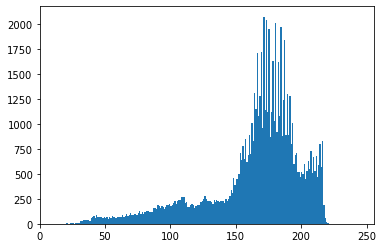

hist : (256, 1) float32


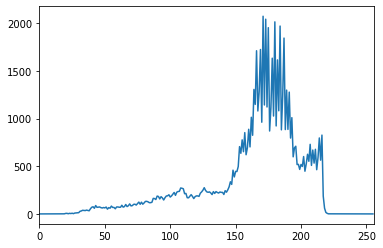

In [12]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('banana.jpg', cv2.IMREAD_GRAYSCALE)

print('img: ', img.shape, img.dtype)
print('img.ravel()', img.ravel().shape, img.ravel().dtype)

#pyplot이용한 히스토그램 그리기
plt.hist(img.ravel(), 256, [0, 256]) #256개의 상자, [0,256]값 대해 계산
plt.xlim([0, 256])
plt.show()

#이미지의 0번째 채널을 256개 상자 이용해 히스토그램 계산
hist = cv2.calcHist([img], [0], None, [256], [0,256])
print('hist :', hist.shape, hist.dtype)
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

hist : (256, 1) float32


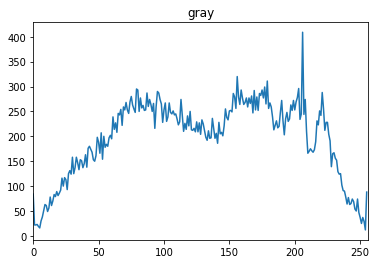

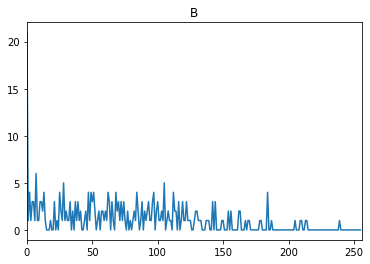

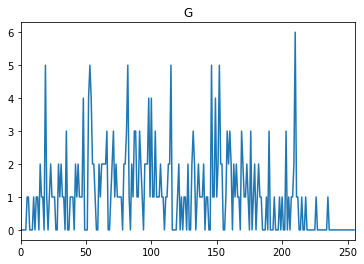

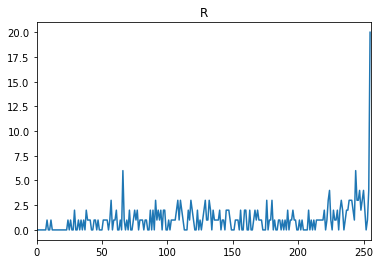

In [4]:
import cv2
from matplotlib import pyplot as plt

img_color = cv2.imread('fruit.jpg', cv2.IMREAD_COLOR)
img_gray = cv2.imread('fruit.jpg', cv2.IMREAD_GRAYSCALE)
split = cv2.split(img_color)

#gray이미지의 0번째 채널을 256개 상자 이용해 히스토그램 계산
hist = cv2.calcHist([img_gray], [0], None, [256], [0,256])
print('hist :', hist.shape, hist.dtype)
plt.plot(hist)
plt.xlim([0, 256])
plt.title('gray')
plt.show()

#루프돌면서 각 컬러별 히스토그램 계산
for i in range(3):
    hist = cv2.calcHist(split[i], [0] ,None, [256], [0,256])
    plt.plot(hist)
    plt.xlim([0,256])
    
    if i == 0:
        plt.title('B')
    elif i == 1:
        plt.title('G')
    elif i == 2:
        plt.title('R')
    
    plt.show()
    


Histogram Equalization

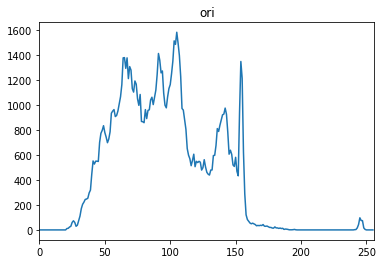

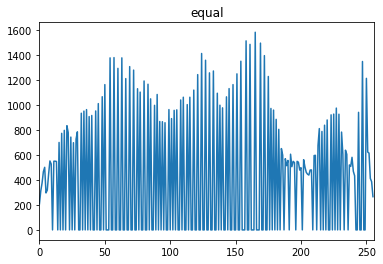

In [7]:
import cv2

ori = cv2.imread('original.jpg', cv2.IMREAD_GRAYSCALE)

equal_img = cv2.equalizeHist(ori)

cv2.imshow('ori', ori)
cv2.imshow('equal_img', equal_img)

hist = cv2.calcHist([ori], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.title('ori')
plt.show()

hist = cv2.calcHist([equal_r], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.title('equal')

plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

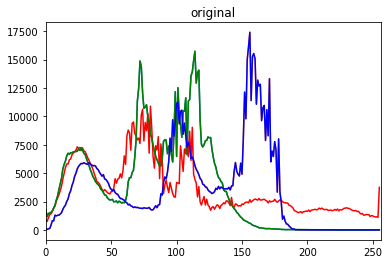

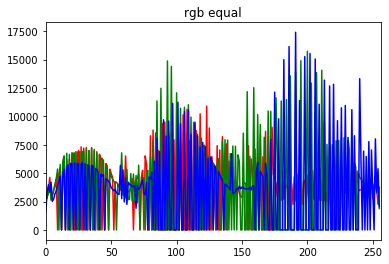

In [4]:
#RGB칼라그림대한 Histogram Eqialization
import cv2
from matplotlib import pyplot as plt

#이미지읽고 RGB영상으로 변환 후 채널 split
src = cv2.imread('night.jpg',cv2.IMREAD_COLOR)
rgb_src = cv2.cvtColor(src,cv2.COLOR_BGR2RGB )
split_rgb = cv2.split(rgb_src)

#원본영상의 히스토그램 그리기
hist1 = cv2.calcHist([split_rgb[0]], [0], None, [256], [0,256])
hist2 = cv2.calcHist([split_rgb[1]], [0], None, [256], [0,256])
plt.plot(hist2)
hist3 = cv2.calcHist([split_rgb[2]], [0], None, [256], [0,256])
plt.plot(hist3)

plt.plot(hist1,'-r')
plt.plot(hist2,'-g')
plt.plot(hist3,'-b')

plt.xlim([0, 256])
plt.title('original')

plt.show()

#equalization 채널별 진행
equal_r = cv2.equalizeHist(split_rgb[0])
equal_g = cv2.equalizeHist(split_rgb[1])
equal_b = cv2.equalizeHist(split_rgb[2])
#채널 합치기
equal_img = cv2.merge([equal_r, equal_g, equal_b])

#변형 영상 히스토그램 
hist1 = cv2.calcHist([equal_r], [0], None, [256], [0,256])
hist2 = cv2.calcHist([equal_g], [0], None, [256], [0,256])
hist3 = cv2.calcHist([equal_b], [0], None, [256], [0,256])

plt.plot(hist1,'-r')
plt.plot(hist2,'-g')
plt.plot(hist3,'-b')

plt.xlim([0, 256])
plt.title('rgb equal')
plt.show()

#원본 및 변형 영상 출력
cv2.imshow('src', src)
cv2.imshow('equal_img', equal_img)

cv2.waitKey()
cv2.destroyAllWindows()

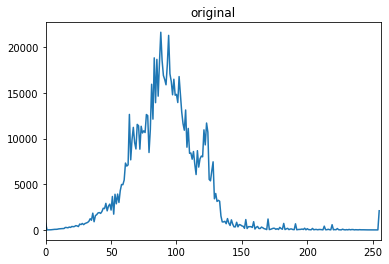

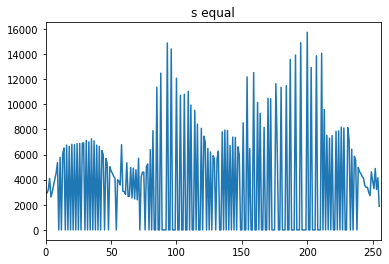

In [5]:
#HSV이미지 대한 Equalization (s만)
import cv2
from matplotlib import pyplot as plt

#이미지 읽고 HSV이미지로 변환
src = cv2.imread('night.jpg',cv2.IMREAD_COLOR)
hsv_src = cv2.cvtColor(src,cv2.COLOR_BGR2HSV )
split_hsv = cv2.split(hsv_src)

#원본 이미지 히스토그램(S)
hist = cv2.calcHist([split_hsv[1]], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.title('original')
plt.show()

#equalization 진행(s채널)
equal_s = cv2.equalizeHist(split_rgb[1])
#이미지 다시 합치기(채널 다시 합치기)
equal_img = cv2.merge([split_hsv[0], equal_s, split_hsv[2]])

#변형 이미지 히스토그램(S)
hist = cv2.calcHist([equal_s], [0], None, [256], [0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.title('s equal')
plt.show()

cv2.imshow('src', src)
cv2.imshow('equal_img', equal_img)

cv2.waitKey()
cv2.destroyAllWindows()

비디오 캡쳐 후 (320, 240)크기로 변경하고 GRAYSCALE로 변경한 후 좌상단에 붉은 글자로 'Recording'텍스트 추가  
키보드로 s를 입력하면 현재화면을 이미지로 저장

In [27]:
import cv2
import numpy as np

capture = cv2.VideoCapture(0)#기본카메라로 비디오캡쳐
capture.set(cv2.CAP_PROP_FRAME_WIDTH,320)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT,240)

while True:
    ret, frame = capture.read() #비디오 캡쳐하여 frame이라는 변수로 전달, ret는 성공이면 True
    if ret:
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.putText(frame, 'Recording', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
        cv2.imshow('gray_video', frame) #frame을 gray_video 라는 윈도우에 뿌림
        
        keycode = cv2.waitKey()
        if keycode == ord('s'):
            cv2.imwrite("./gray_capture.jpg" , frame)
            print('화면이 캡쳐 되었습니다!')
        
        if keycode == 27: 
            break #ESC누르면 종료
    
    else:
        print('read 오류!')
        break
        
capture.release()
cv2.destroyAllWindows()

In [25]:
#강사님 코드
import cv2
import numpy as np

capture = cv2.VideoCapture(0)#기본카메라로 비디오캡쳐
capture.set(cv2.CAP_PROP_FRAME_WIDTH,320)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT,240)

while capture.isOpened(): #VideoCapture 성공유무 반환
    ret, frame = capture.read() #비디오 캡쳐하여 frame이라는 변수로 전달, ret는 성공이면 True
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, 'Recording', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2, cv2.LINE_AA)
        
    cv2.imshow('gray_video', frame) #gray_frame을 gray_video 라는 윈도우에 뿌림
 
    if cv2.waitKey(1) == ord('s'):
            cv2.imwrite("./gray_capture.jpg" , gray_frame)
            print('화면이 캡쳐 되었습니다!')
        
    elif cv2.waitKey(30) == 27: 
        break #ESC누르면 종료
    
       
capture.release()
cv2.destroyAllWindows()

어두운 야경사진을 RGB로 나누어 histogram Equalization 수행하고 이미지 B를 만들어 비교

In [9]:
import cv2
import numpy as np

src = cv2.imread('night_seoul.jpg', cv2.IMREAD_COLOR)
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

splits = cv2.split(src)

equal_r = cv2.equalizeHist(splits[0])
equal_g = cv2.equalizeHist(splits[1])
equal_b = cv2.equalizeHist(splits[2])

equal_img = cv2.merge([equal_r, equal_g, equal_b])

cv2.imshow('src', src)
cv2.imshow('equal_img', equal_img)

cv2.waitKey()
cv2.destroyAllWindows()